# 如何使用背景分离方法

- 背景分离（BS）是一种通过使用静态相机来生成前景掩码（即包含属于场景中的移动对象像素的二进制图像）的常用技术。
- 顾名思义，BS计算前景掩码，在当前帧与背景模型之间执行减法运算，其中包含场景的静态部分，或者更一般而言，考虑到所观察场景的特征，可以将其视为背景的所有内容。

![](data/Background_Subtraction_Tutorial_Scheme.png)

背景建模包括两个主要步骤：
1. 背景初始化；
2. 背景更新。

第一步，计算背景的初始模型，而在第二步中，更新模型以适应场景中可能的变化。

在本教程中，我们将学习如何使用OpenCV中的BS。

### 目标

在本教程中，您将学习如何：
1. 使用**cv::VideoCapture**从视频或图像序列中读取数据；
2. 通过使用**cv::BackgroundSubtractor**类创建和更新背景类；
3. 通过使用**cv::imshow**获取并显示前景蒙版；

#### 代码

在下面，您可以找到源代码。我们将让用户选择处理视频文件或图像序列。在此示例中，我们将使用**cv::BackgroundSubtractorMOG2**生成前景掩码。

结果和输入数据将显示在屏幕上。

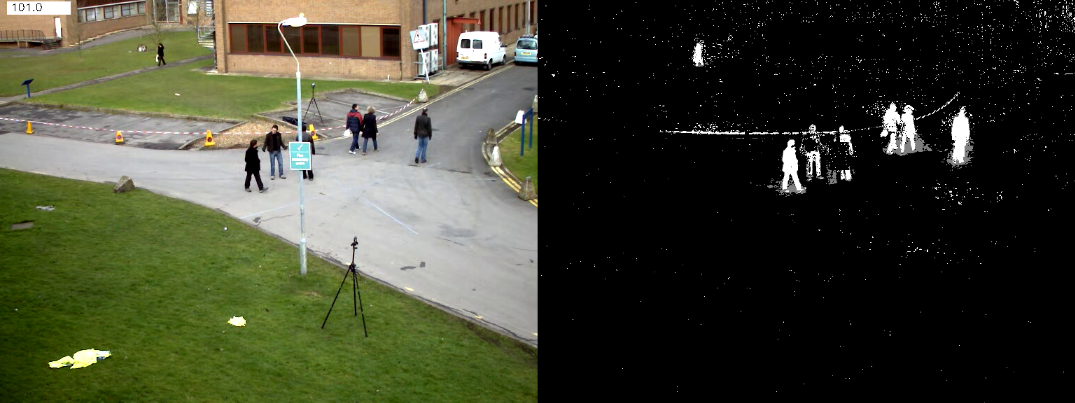

In [1]:
import numpy as np
import cv2 as cv
from IPython.display import clear_output, display, HTML
from PIL import Image
import time

# 创建背景分离对象
backSub = cv.createBackgroundSubtractorMOG2()
# backSub = cv.createBackgroundSubtractorKNN()

cap = cv.VideoCapture('data/vtest.avi')

while True:
    clear_output(wait=True)

    ret, frame = cap.read()
    if frame is None:
        break
    
    # 更新背景模型
    fgMask = backSub.apply(frame)
    
    # 获取帧号并将其写入当前帧
    cv.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
    cv.putText(frame, str(cap.get(cv.CAP_PROP_POS_FRAMES)), (15, 15),
               cv.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    
    #展示当前帧和背景掩码
    mask = cv.merge((fgMask,fgMask,fgMask))

    res = np.hstack((frame, mask))
    res = cv.resize(res, None, fx=0.7, fy = 0.7)
    
    res = cv.cvtColor(res, cv.COLOR_BGR2RGB)
    img = Image.fromarray(res)

    display(img)

    if cap.get(cv.CAP_PROP_POS_FRAMES) > 100:
        break

    # 控制帧率
    time.sleep(0.1)

cap.release()

#### 解释

我们讨论上面代码的主要部分：
- 一个**cv::BackgroundSubtractor**对象将用于生成前景掩码。在此示例中，使用了默认参数，但是也可以在create函数中声明特定的参数。

```python
# 创建背景分离对象
backSub = cv.createBackgroundSubtractorMOG2()
# backSub = cv.createBackgroundSubtractorKNN()
```

- 一个**cv::VideoCapture**对象用于读取输入视频或输入图像序列。

```python
capture = cv.VideoCapture('data/vtest.avi')
```

- 每帧都用于计算前景掩码和更新背景。如果要更改用于更新背景模型的学习率，可以通过将参数传递给apply方法来设置特定的学习率。

```python
    # 更新背景模型
    fgMask = backSub.apply(frame)
```

- 当前帧号可以从**cv::VideoCapture**对象中提取，并标记在当前帧的左上角。白色矩形用于突出显示黑色的帧编号。

```python
    # 获取帧号并将其写入当前帧
    cv.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
    cv.putText(frame, str(capture.get(cv.CAP_PROP_POS_FRAMES)), (15, 15),
               cv.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
```

- 我们准备显示当前的输入框和结果。
```python
    #展示当前帧和背景掩码
    mask = cv.merge((fgMask,fgMask,fgMask))

    res = np.hstack((frame, mask))
    res = cv.resize(res, None, fx=0.5, fy = 0.5)
    
    res = cv.cvtColor(res, cv.COLOR_BGR2RGB)
    img = Image.fromarray(res)

    display(img)
```

### 结果

### 参考
- Background Models Challenge (BMC) website
- A Benchmark Dataset for Foreground/Background Extraction